In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Исследуем зависимость от количества тредов. Для каждого значения $P = \{1, 2, 4, 8, 16\}$ сделаем десять измерений, чтобы затем усреднить. 

Парметры запуска:
$$./run\ 10000000\ 10000\ P$$

In [2]:
T_1 = np.array([2.9154, 2.9857, 3.4031, 2.9551, 2.8506,
                3.0389, 3.3648, 2.8662, 3.0322, 3.0784])
T_2 = np.array([1.5359, 1.5832, 1.699, 1.5519, 1.5288,
                1.5842, 1.6662, 1.7291, 1.6038, 1.4789])
T_3 = np.array([1.5653, 1.622, 1.6736, 1.6315, 1.7405,
                1.5725, 1.7838, 1.7003, 1.6952, 1.5796])
T_4 = np.array([1.6719, 1.6318, 1.7593, 1.4854, 1.6472,
                1.6282, 1.4976, 1.5407, 1.4963, 1.5923])
T_5 = np.array([1.644, 1.5483, 1.7442, 1.6897, 1.5833,
                1.6096, 1.4518, 1.575, 1.5477, 1.5144])

t_1 = np.mean(T_1)
t_2 = np.mean(T_2)
t_3 = np.mean(T_3)
t_4 = np.mean(T_4)
t_5 = np.mean(T_5)

Измерим $T_{1}$. Для этого будем использовать специальную программу $sequential.c$

Параметры запуска:
$$./special\ 10000000$$

In [13]:
T = np.array([2.8703, 2.609, 2.3817, 2.4025, 2.4246,
              2.3769, 2.3862, 2.3702, 2.491, 2.366])

t = np.mean(T)

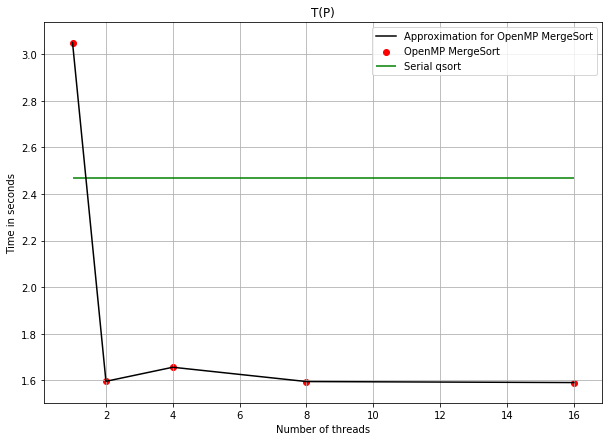

In [15]:
x = np.array([1, 2, 4, 8, 16])
y = np.array([t_1, t_2, t_3, t_4, t_5])

plt.figure(figsize=(10,7))

plt.plot(x, y, "black", label='Approximation for OpenMP MergeSort')
plt.scatter(x, y, c='red', label='OpenMP MergeSort')
plt.hlines(t, 1, 16, color='green', label='Serial qsort')

plt.xlabel("Number of threads")
plt.ylabel("Time in seconds")

plt.title("T(P)")
plt.grid()
plt.legend()
plt.show()

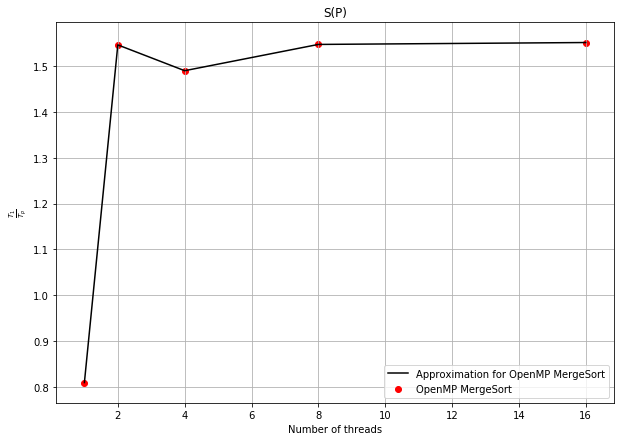

In [21]:
x = np.array([1, 2, 4, 8, 16])
y = np.array([t_1, t_2, t_3, t_4, t_5])

plt.figure(figsize=(10,7))

plt.plot(x, t/ y, "black", label='Approximation for OpenMP MergeSort')
plt.scatter(x, t / y, c='red', label='OpenMP MergeSort')

plt.xlabel("Number of threads")
plt.ylabel(r"$\frac{T_1}{T_p}$")

plt.title("S(P)")
plt.grid()
plt.legend()
plt.show()

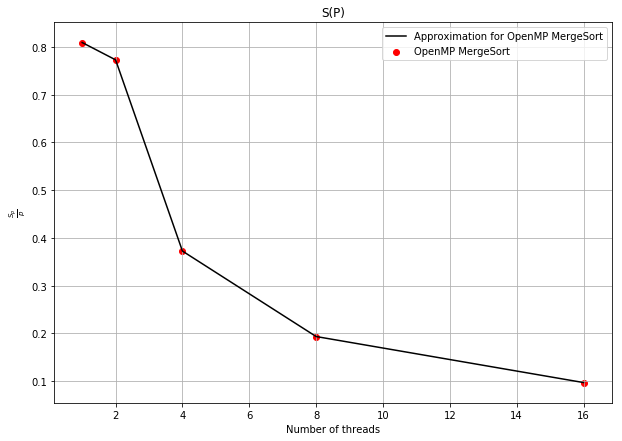

In [22]:
x = np.array([1, 2, 4, 8, 16])
y = np.array([t_1, t_2, t_3, t_4, t_5])

plt.figure(figsize=(10,7))

plt.plot(x, t/ (x*y), "black", label='Approximation for OpenMP MergeSort')
plt.scatter(x, t / (x*y), c='red', label='OpenMP MergeSort')

plt.xlabel("Number of threads")
plt.ylabel(r"$\frac{S_p}{p}$")

plt.title("S(P)")
plt.grid()
plt.legend()
plt.show()

** Возможное объяснение того факта, что при 2, 4, 8 и 16 тредах не наблюдается значительное ускорение, а при 4 - слабое увеличение времени работы по сравнению с остальными:** Возможно, что 2 потоков хватает для выполнения программы, т.е. таски появляются и тут же подхватываются свободными тредами. А при четырех начинается проблема с шедулером: ему приходится выбирать, кому отдать таск.